## DATA DICTIONARY
CustomerID: Unique ID for every customer

Gender : Male/Female

Age : age of the customers

Annual Income (k$) : Annual Income of the customers in 1000's (dollar) 

Spending Score (1-100) : Score assigned by the mall based on customer behavior and spending nature

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)
warnings.simplefilter(action="ignore",category=UserWarning)

In [2]:
df=pd.read_csv("customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

<Axes: xlabel='Gender', ylabel='count'>

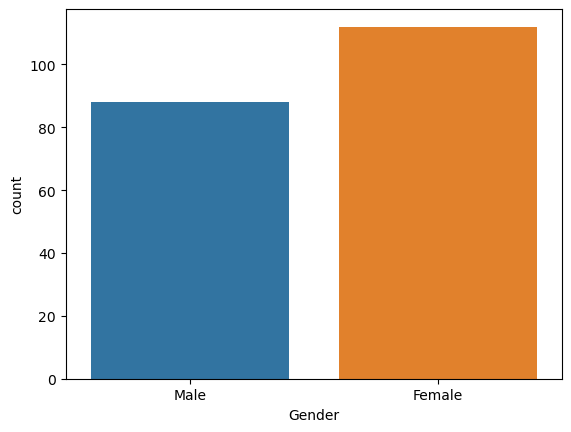

In [8]:
sns.countplot(df,x="Gender",orient="v")

Dataset comprises of a higher female proportion

<Axes: xlabel='Age', ylabel='Count'>

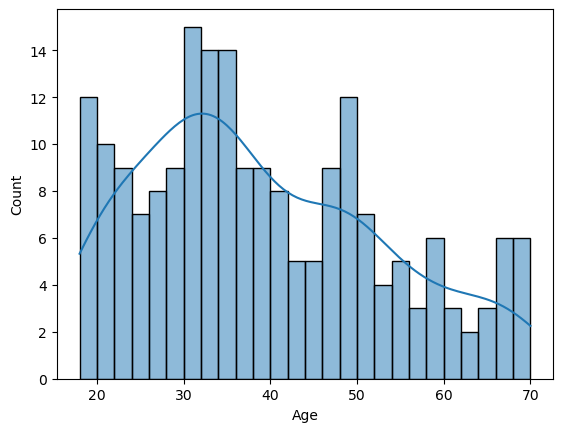

In [9]:
sns.histplot(df,x="Age",kde=True,binwidth=2)

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

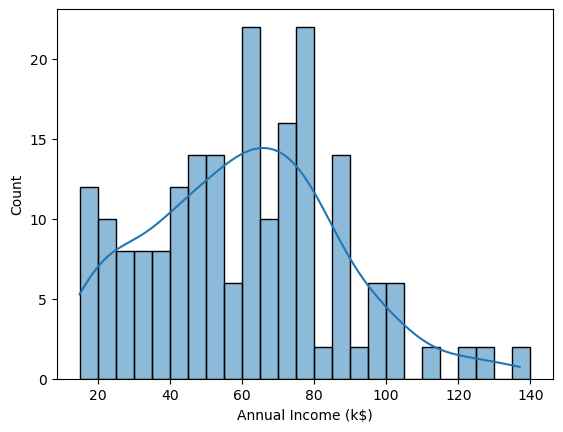

In [10]:
sns.histplot(df,x="Annual Income (k$)",kde=True,binwidth=5)

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

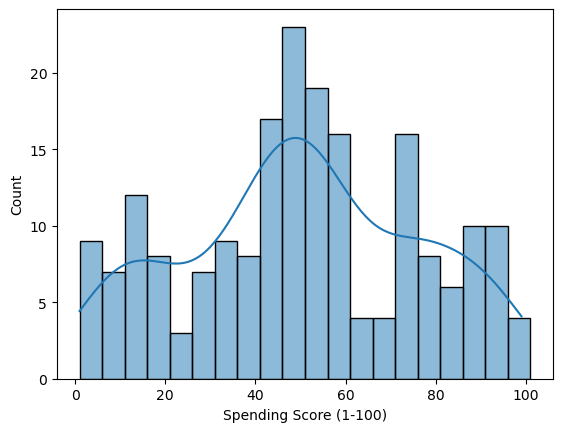

In [11]:
sns.histplot(df,x="Spending Score (1-100)",kde=True,binwidth=5)

<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

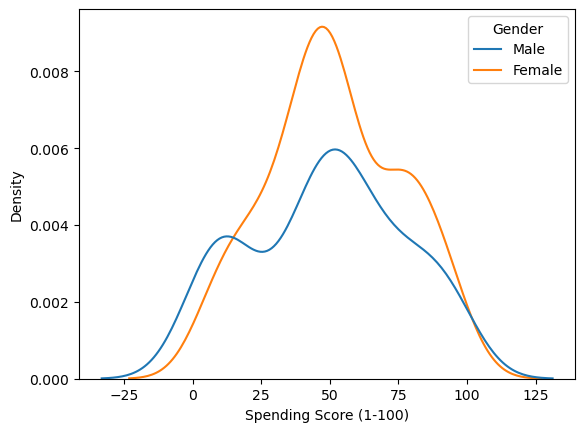

In [12]:
sns.kdeplot(df,x="Spending Score (1-100)",hue="Gender",multiple="layer")

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

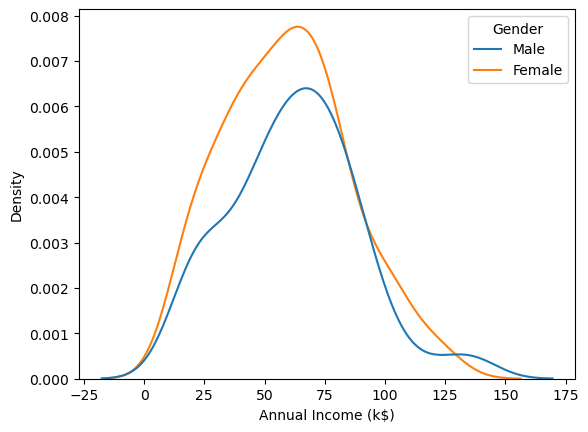

In [13]:
sns.kdeplot(df,x="Annual Income (k$)",hue="Gender",multiple="layer")

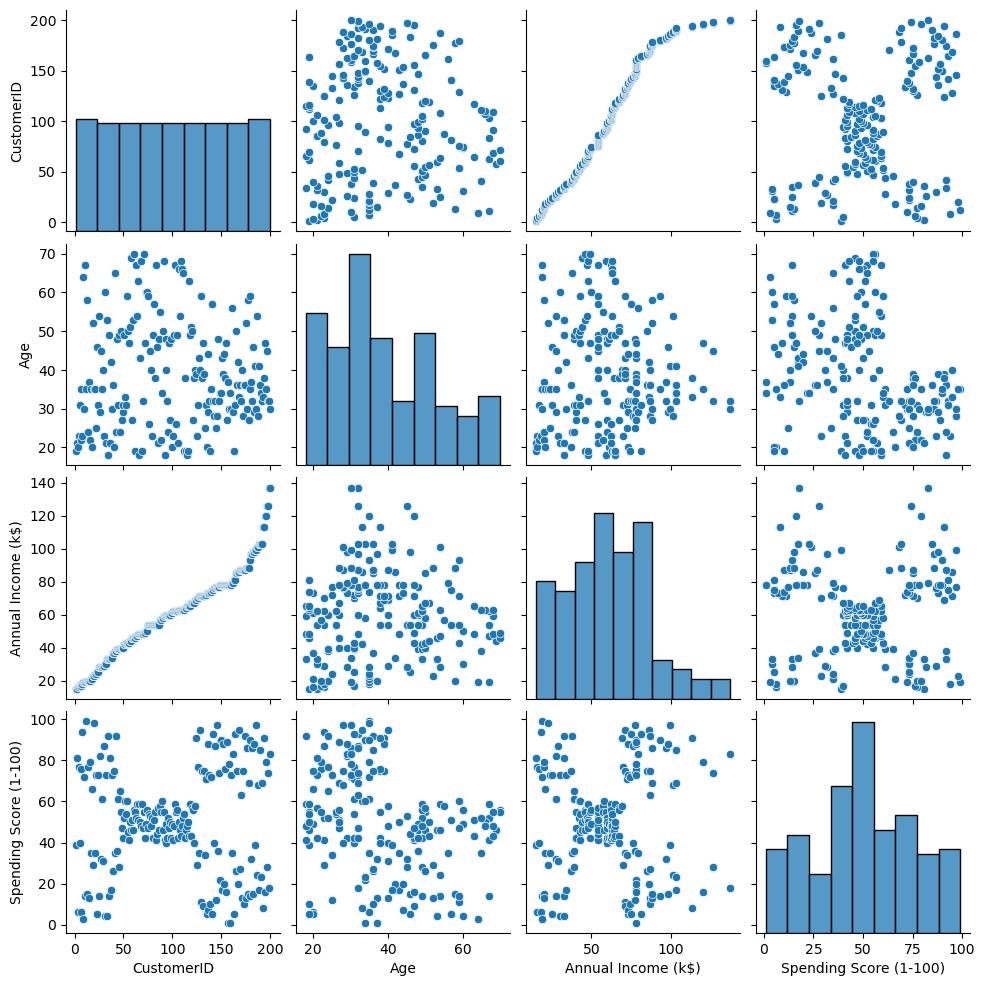

In [14]:
sns.pairplot(df)

In [15]:
df.groupby(['Gender'])['Age','Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


<Axes: >

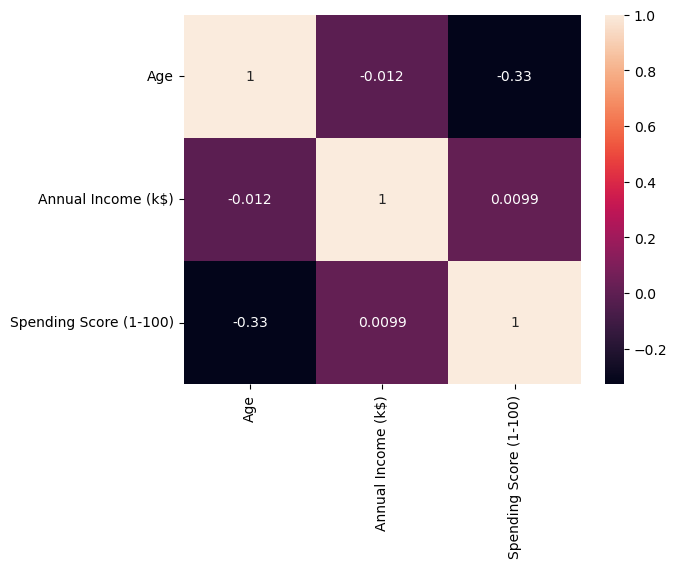

In [16]:
df1=df.copy()
df1=df1.drop("CustomerID",axis=1)
corr=df1.corr()
sns.heatmap(corr,annot=True)

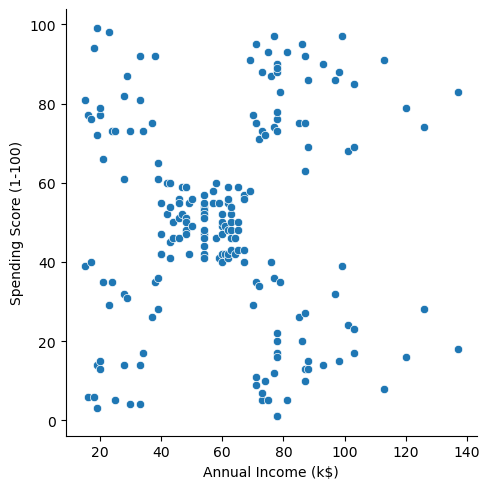

In [17]:
sns.relplot(df1,x="Annual Income (k$)",y="Spending Score (1-100)",kind="scatter")

WCSS- Within Clusters Sum of Squares to choose optimum no. of clusters


In [18]:
df1=df1.drop(['Gender','Age'],axis=1)
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=56)
    kmeans.fit(df1.values)
    wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'ELBOW CURVE')

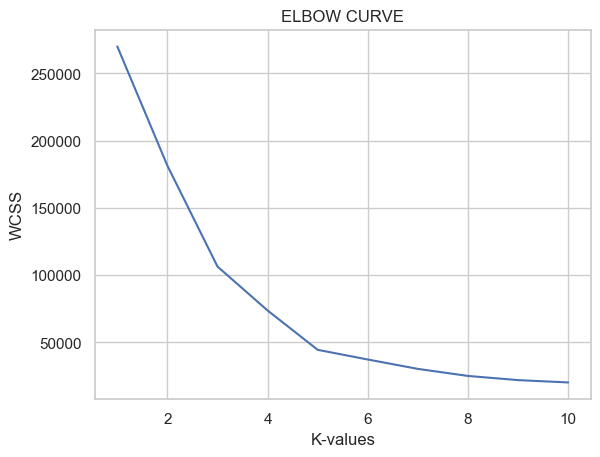

In [19]:
sns.set(style="whitegrid")
plt.plot(range(1,11),wcss)
plt.xlabel("K-values")
plt.ylabel("WCSS")
plt.title("ELBOW CURVE")

In [20]:
kmeans=KMeans(n_clusters=5,random_state=82)

y=kmeans.fit_predict(df1)
print(y)
df['Label']=y

[4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 0 4 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 3 2 0 2 3 2 3 2 0 2 3 2 3 2 3 2 3 2 0 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

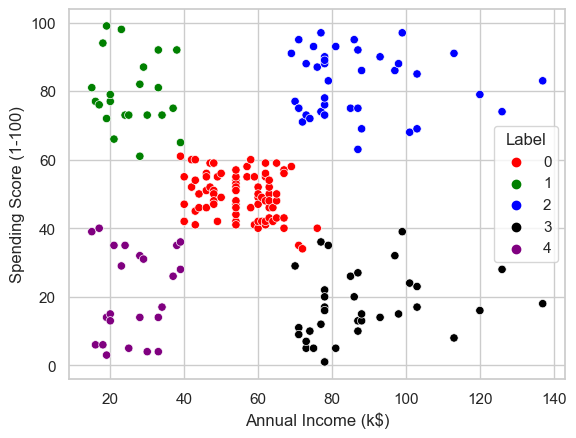

In [21]:
sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=df,hue="Label",palette=['red','green','blue','black','purple'])

In [22]:
df.groupby(['Label'])['Age','Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Label,,,
0,42.716049,55.296296,49.518519
1,25.272727,25.727273,79.363636
2,32.692308,86.538462,82.128205
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


In [23]:
pd.crosstab(df['Label'],df['Gender'])

Gender,Female,Male
Label,,
0,48,33
1,13,9
2,21,18
3,16,19
4,14,9


####  TARGET CUSTOMER GROUP -Group 2
A higher proportion of female than male citing the predominance of female in our target group. 

Further the mean age is 33(approx) with mean salaries as 86k$ and mean spending score around 82. 
